# Tubes AI: Tahap A


# Exploratory Data Analysis
---
13516013 - Azka Nabilah Mumtaz <br>
13516062 - Yusuf Rahmat Pratama<br>
13516095 - Faza Fahleraz<br>
13516101 - Kelvin Kristian<br>
13516102 - Steven Sukma Limanus



This exploration is done to gain insights on the dataset. It is done on the train set.

In [53]:
import pandas as pd
import matplotlib as plt
import math

%matplotlib inline

## Read Data

In [3]:
train = pd.read_csv('../data/tubes2_HeartDisease_train.csv')
train.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'serum_cholestrol', 
                 'high_fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                 'st_depression', 'peak_exercise_st', 'major_vessels_num', 'thal', 'diagnosis']
train_x = train.iloc[:, :13]
train_y = train.iloc[:, 13:]
train.head()

age  sex  chest_pain_type rest_blood_pressure serum_cholestrol  \
0   54    1                4                 125              216   
1   55    1                4                 158              217   
2   54    0                3                 135              304   
3   48    0                3                 120              195   
4   50    1                4                 120                0   

  high_fasting_blood_sugar resting_ecg max_heart_rate exercise_induced_angina  \
0                        0           0            140                       0   
1                        0           0            110                       1   
2                        1           0            170                       0   
3                        0           0            125                       0   
4                        0           1            156                       1   

  st_depression peak_exercise_st major_vessels_num thal  diagnosis  
0             0                ?                 ?    ?          1  
1           2.5                2                 ?    ?          1  
2             0                1                 0    3          0  
3             0                ?                 ?    ?          0  
4             0                1                 ?    6          3

## Class Label Distribution

#### General descriptions:

In [4]:
train_y.describe()

diagnosis
count  779.000000
mean     0.989730
std      1.138211
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      4.000000

#### Class distribution:

In [5]:
train_y['diagnosis'].value_counts().plot(kind='bar', figsize=(8, 6))

### Some Thougts

As we can see, the traning set is imbalanced. Class 0 is significantly overrepresented in the data while class 4 only have less than 30 examples.

Oversampling/undersampling should be done to improve the data's balance.

## Features Distribution

### A. age

#### General descriptions:

In [6]:
age = train_x['age'].astype(int)
age.describe()

count    779.000000
mean      53.509628
std        9.505017
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

#### Value distribution:

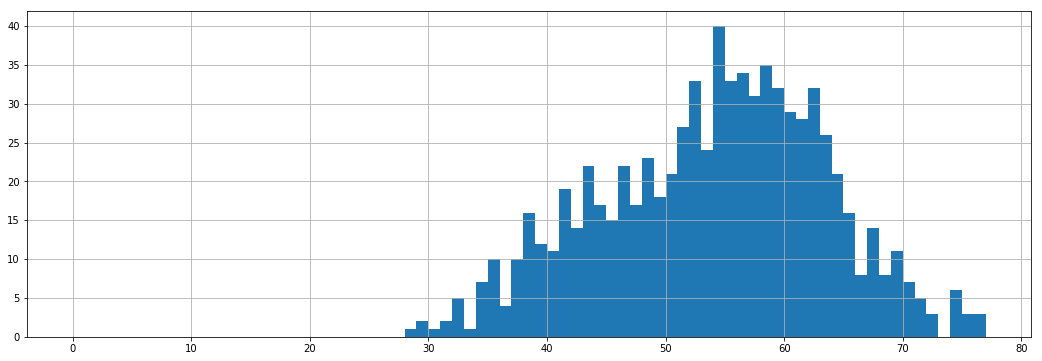

In [7]:
age.hist(bins=age.max(), range=(0, age.max()), figsize=(18, 6))

#### Box plot

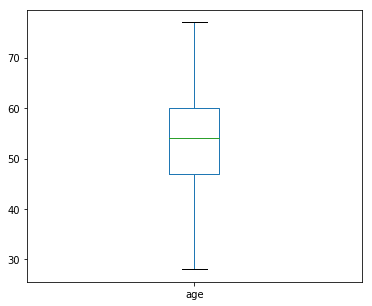

In [8]:
age.plot.box(figsize=(6, 5))

### B. sex

#### General descriptions:

In [9]:
sex = train_x['sex'].astype(int)
sex.describe()

count    779.000000
mean       0.779204
std        0.415050
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

#### Value distribution:

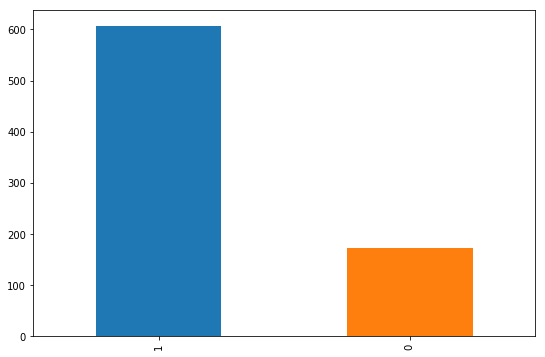

In [10]:
train_x['sex'].value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

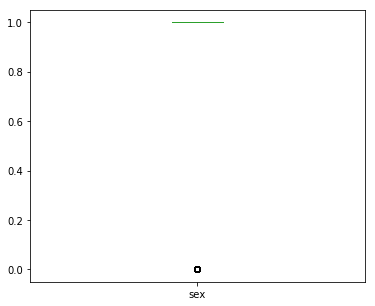

In [11]:
sex.plot.box(figsize=(6,5))

### C. chest_pain_type

#### General descriptions:

In [12]:
chest_pain = train_x['chest_pain_type'].astype(int)
chest_pain.describe()

count    779.000000
mean       3.264442
std        0.926284
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: chest_pain_type, dtype: float64

#### Value distribution:

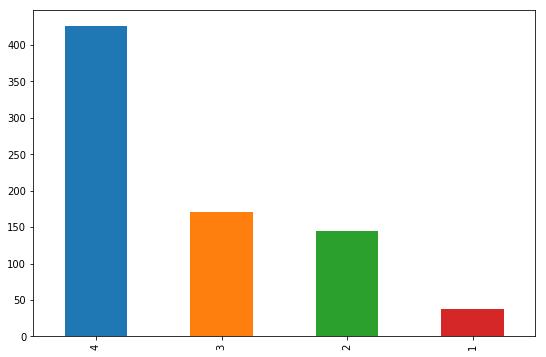

In [13]:
train_x['chest_pain_type'].value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

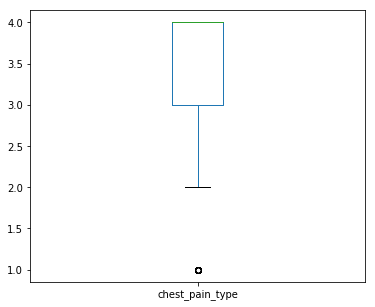

In [14]:
chest_pain.plot.box(figsize=(6, 5))

### D. rest_blood_pressure

#### Unknown values:

In [15]:
print('Num of unknown values:', 
      train_x['rest_blood_pressure'][train_x['rest_blood_pressure'] == '?'].count(),
     '/', train_x['rest_blood_pressure'].count())

Num of unknown values: 47 / 779


#### General descriptions:

In [16]:
rest_blood_pressure = train_x['rest_blood_pressure'][train_x['rest_blood_pressure'] != '?'].astype(int)
rest_blood_pressure.describe()

count    732.000000
mean     132.355191
std       19.133545
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_blood_pressure, dtype: float64

#### Value distribution:

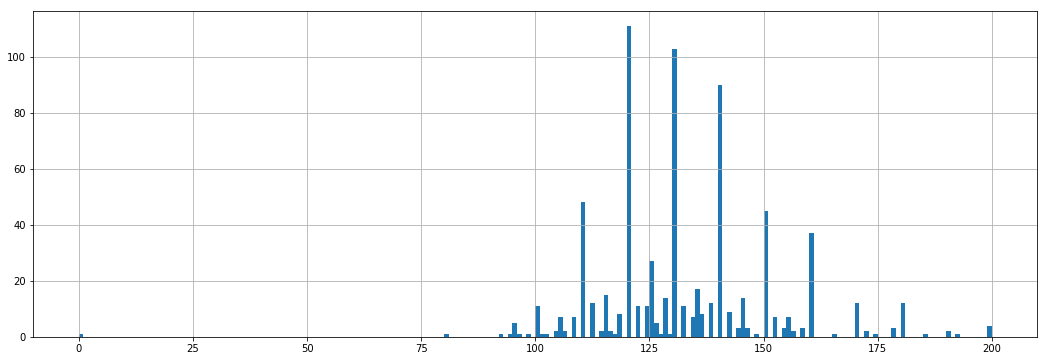

In [17]:
rest_blood_pressure.hist(bins=rest_blood_pressure.max(), figsize=(18, 6))

#### Box plot

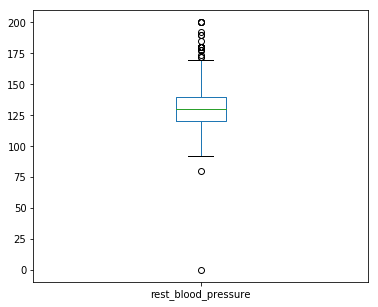

In [18]:
rest_blood_pressure.plot.box(figsize=(6, 5))

### E. serum_cholestrol

#### Unknown values:

In [19]:
print('Num of unknown values:', 
      train_x['serum_cholestrol'][train_x['serum_cholestrol'] == '?'].count(),
     '/', train_x['serum_cholestrol'].count())

Num of unknown values: 24 / 779


#### General descriptions:

In [20]:
serum_cholestrol = train_x['serum_cholestrol'][train_x['serum_cholestrol'] != '?'].astype(int)
serum_cholestrol.describe()

count    755.000000
mean     200.309934
std      109.938501
min        0.000000
25%      177.000000
50%      225.000000
75%      270.000000
max      529.000000
Name: serum_cholestrol, dtype: float64

#### Value distribution:

In [21]:
serum_cholestrol.hist(bins=serum_cholestrol.max(), figsize=(18, 6))

#### Box plot

In [22]:
serum_cholestrol.plot.box()

### F. high_fasting_blood_sugar

#### Unknown values:

In [29]:
print('Num of unknown values:', 
      train_x['rest_blood_pressure'][train_x['rest_blood_pressure'] == '?'].count(),
     '/', train_x['rest_blood_pressure'].count())

Num of unknown values: 47 / 779


#### General descriptions:

In [38]:
high_fasting_blood_sugar = train_x['serum_cholestrol'][train_x['serum_cholestrol'] != '?'].astype(int)
high_fasting_blood_sugar.describe()

count    755.000000
mean     200.309934
std      109.938501
min        0.000000
25%      177.000000
50%      225.000000
75%      270.000000
max      529.000000
Name: serum_cholestrol, dtype: float64

#### Value distribution:

In [35]:
high_fasting_blood_sugar.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

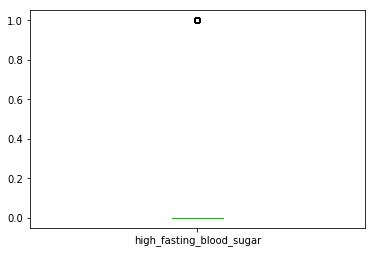

In [36]:
high_fasting_blood_sugar.plot.box()

### G. resting_ecg

#### Unknown values:

In [37]:
print('Num of unknown values:', 
      train_x['resting_ecg'][train_x['resting_ecg'] == '?'].count(),
     '/', train_x['resting_ecg'].count())

Num of unknown values: 1 / 778


#### General descriptions:

In [58]:
train_x = train_x.dropna(subset=['resting_ecg'])
resting_ecg = train_x['resting_ecg'].astype(int)
resting_ecg.describe()

count    777.000000
mean       0.603604
std        0.809026
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: resting_ecg, dtype: float64

#### Value distribution:

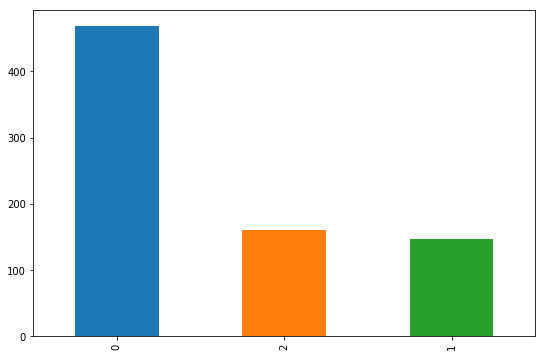

In [59]:
resting_ecg.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

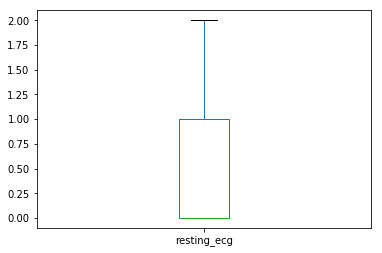

In [60]:
resting_ecg.plot.box()

### H. max_heart_rate

#### Unknown values:

In [61]:
print('Num of unknown values:', 
      train_x['max_heart_rate'][train_x['max_heart_rate'] == '?'].count(),
     '/', train_x['max_heart_rate'].count())

Num of unknown values: 44 / 777


#### General descriptions:

In [65]:
max_heart_rate = train_x['max_heart_rate'][train_x['max_heart_rate'] != '?'].astype(int)
max_heart_rate.describe()

count    733.000000
mean     138.330150
std       26.116074
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: max_heart_rate, dtype: float64

#### Value distribution:

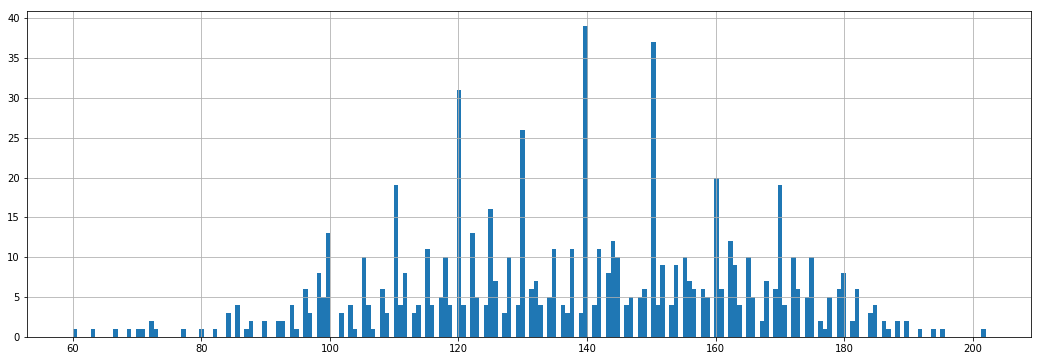

In [67]:
max_heart_rate.hist(bins=max_heart_rate.max(), figsize=(18, 6))

#### Box plot

In [68]:
max_heart_rate.plot.box()

### I. exercise_induced_angina

#### Unknown values:

In [69]:
print('Num of unknown values:', 
      train_x['exercise_induced_angina'][train_x['exercise_induced_angina'] == '?'].count(),
     '/', train_x['exercise_induced_angina'].count())

Num of unknown values: 44 / 777


#### General descriptions:

In [70]:
exercise_induced_angina = train_x['exercise_induced_angina'][train_x['exercise_induced_angina'] != '?'].astype(int)
exercise_induced_angina.describe()

count    733.000000
mean       0.392906
std        0.488730
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exercise_induced_angina, dtype: float64

#### Value distribution:

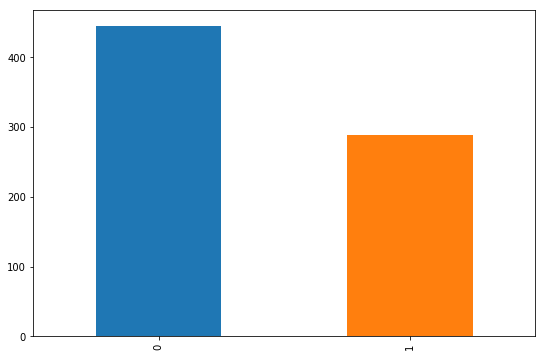

In [71]:
exercise_induced_angina.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

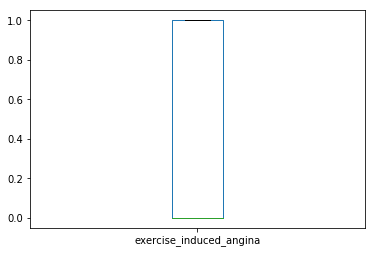

In [72]:
exercise_induced_angina.plot.box()

### J. st_depression

#### Unknown values:

In [73]:
print('Num of unknown values:', 
      train_x['st_depression'][train_x['st_depression'] == '?'].count(),
     '/', train_x['st_depression'].count())

Num of unknown values: 49 / 777


#### General descriptions:

In [75]:
st_depression = train_x['st_depression'][train_x['st_depression'] != '?'].astype(float)
st_depression.describe()

count    728.000000
mean       3.947940
std        7.796939
min       -2.600000
25%        0.000000
50%        1.000000
75%        3.000000
max       62.000000
Name: st_depression, dtype: float64

#### Value distribution:

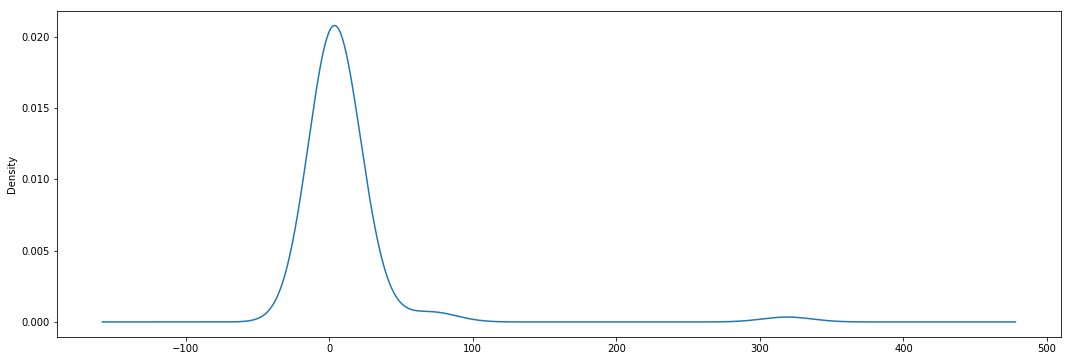

In [79]:
st_depression.value_counts().plot(kind='density', figsize=(18, 6))

#### Box plot

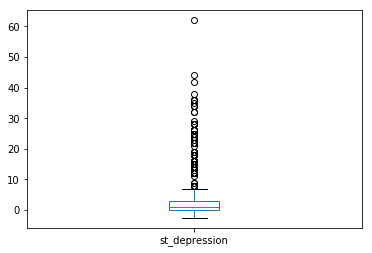

In [80]:
st_depression.plot.box()

### K. peak_exercise_st

#### Unknown values:

In [81]:
print('Num of unknown values:', 
      train_x['peak_exercise_st'][train_x['peak_exercise_st'] == '?'].count(),
     '/', train_x['peak_exercise_st'].count())

Num of unknown values: 261 / 777


#### General descriptions:

In [87]:
peak_exercise_st = train_x['peak_exercise_st'][train_x['peak_exercise_st'] != '?'].astype(int)
peak_exercise_st.describe()

count    516.000000
mean       1.763566
std        0.621859
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: peak_exercise_st, dtype: float64

#### Value distribution:

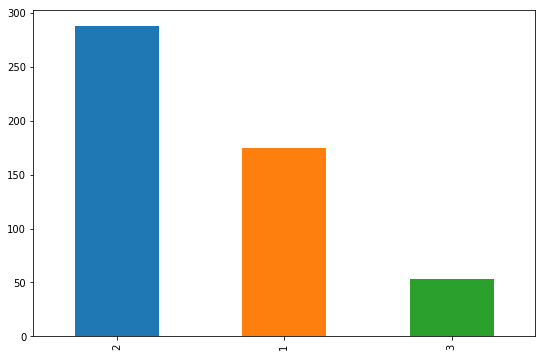

In [88]:
peak_exercise_st.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

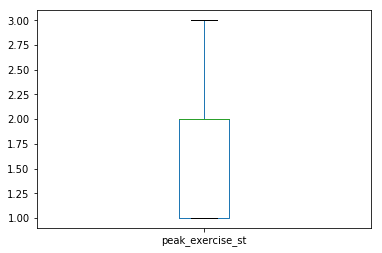

In [89]:
peak_exercise_st.plot.box()

### L. major_vessels_num

#### Unknown values:

In [90]:
print('Num of unknown values:', 
      train_x['major_vessels_num'][train_x['major_vessels_num'] == '?'].count(),
     '/', train_x['major_vessels_num'].count())

Num of unknown values: 512 / 777


#### General descriptions:

In [93]:
major_vessels_num = train_x['major_vessels_num'][train_x['major_vessels_num'] != '?'].astype(int)
major_vessels_num.describe()

count    265.000000
mean       0.686792
std        0.935422
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: major_vessels_num, dtype: float64

#### Value distribution:

In [94]:
major_vessels_num.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

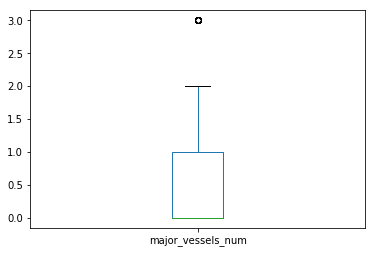

In [95]:
major_vessels_num.plot.box()

### M. thal

#### Unknown values:

In [96]:
print('Num of unknown values:', 
      train_x['thal'][train_x['thal'] == '?'].count(),
     '/', train_x['thal'].count())

Num of unknown values: 406 / 777


#### General descriptions:

In [101]:
thal = train_x['thal'][train_x['thal'] != '?'].astype(int)
thal.describe()

count    371.000000
mean       5.029650
std        1.921904
min        3.000000
25%        3.000000
50%        6.000000
75%        7.000000
max        7.000000
Name: thal, dtype: float64

#### Value distribution:

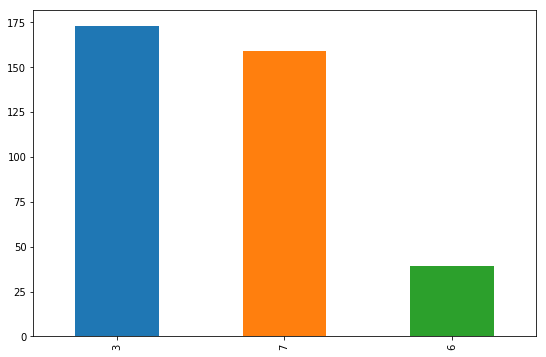

In [102]:
thal.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

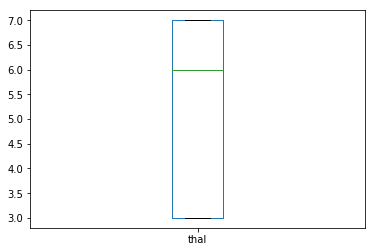

In [103]:
thal.plot.box()

##### End of Section

# Heart Disease Model
---
13516013 - Azka Nabilah Mumtaz <br>
13516062 - Yusuf Rahmat Pratama<br>
13516095 - Faza Fahleraz<br>
13516101 - Kelvin Kristian<br>
13516102 - Steven Sukma Limanus



In [219]:
import pandas as pd
import numpy as np

## Data Preparation & Preprocessing
---
Training data for health disease is read using Pandas' `read_csv()` method, and is preprocessed as such to be ready to fit into the learning model.

### Load data
Training data are read and the data are split between features and labels. The resulting data read are 13 columns as attributes and 1 column as label. A total of 779 rows are read.

In [307]:
train = pd.read_csv('../data/tubes2_HeartDisease_train.csv')
train.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'serum_cholestrol', 
                 'high_fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                 'st_depression', 'peak_exercise_st', 'major_vessels_num', 'thal', 'diagnosis']
train_x = train.iloc[:, :13]
train_y = train.iloc[:, 13:]

train_x.head()

age  sex  chest_pain_type rest_blood_pressure serum_cholestrol  \
0   54    1                4                 125              216   
1   55    1                4                 158              217   
2   54    0                3                 135              304   
3   48    0                3                 120              195   
4   50    1                4                 120                0   

  high_fasting_blood_sugar resting_ecg max_heart_rate exercise_induced_angina  \
0                        0           0            140                       0   
1                        0           0            110                       1   
2                        1           0            170                       0   
3                        0           0            125                       0   
4                        0           1            156                       1   

  st_depression peak_exercise_st major_vessels_num thal  
0             0                ?                 ?    ?  
1           2.5                2                 ?    ?  
2             0                1                 0    3  
3             0                ?                 ?    ?  
4             0                1                 ?    6

### Preprocessing

#### Handle missing values
Some data contain unknown value in some of their attributes, therefore needed to be processed. 

The string '?' that represents the unknown value is replaced with NaN to make data uniformly numeric, and all data are cast into float to process NaN as well (NaN is represented as float in Numpy). 

In [308]:
train_x = train_x.replace('?', np.nan).astype(float)

For now, mean of each attributes is used to input value to the unknown-valued data for the free-discrete attributes, and mode of each attributes is used for the ranged discrete attributes.

In [309]:
categorical_attributes = ["sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", "exercise_induced_angina", "peak_exercise_st", "major_vessels_num", "thal"]
series_attributes = ["age", "rest_blood_pressure", "serum_cholestrol", "max_heart_rate", "st_depression"]

train_x[categorical_attributes] = train_x[categorical_attributes].fillna(train_x.mode().iloc[0])
train_x[series_attributes] = train_x[series_attributes].fillna(train_x.mean())
train_x[categorical_attributes] = train_x[categorical_attributes].astype('category')

train_x_original = train_x.copy()
train_y_original = train_y.copy()

train_x.head()

age  sex chest_pain_type  rest_blood_pressure  serum_cholestrol  \
0  54.0  1.0             4.0                125.0             216.0   
1  55.0  1.0             4.0                158.0             217.0   
2  54.0  0.0             3.0                135.0             304.0   
3  48.0  0.0             3.0                120.0             195.0   
4  50.0  1.0             4.0                120.0               0.0   

  high_fasting_blood_sugar resting_ecg  max_heart_rate  \
0                      0.0         0.0           140.0   
1                      0.0         0.0           110.0   
2                      1.0         0.0           170.0   
3                      0.0         0.0           125.0   
4                      0.0         1.0           156.0   

  exercise_induced_angina  st_depression peak_exercise_st major_vessels_num  \
0                     0.0            0.0              2.0               0.0   
1                     1.0            2.5              2.0               0.0   
2                     0.0            0.0              1.0               0.0   
3                     0.0            0.0              2.0               0.0   
4                     1.0            0.0              1.0               0.0   

  thal  
0  3.0  
1  3.0  
2  3.0  
3  3.0  
4  6.0

#### Drop columns with lots of missing values

Feature columns with a high number of missing values are dropped to ease the model's learning.

In [310]:
train_x = train_x.drop('thal', 1)
train_x = train_x.drop('major_vessels_num', 1)

train_x.head()

age  sex chest_pain_type  rest_blood_pressure  serum_cholestrol  \
0  54.0  1.0             4.0                125.0             216.0   
1  55.0  1.0             4.0                158.0             217.0   
2  54.0  0.0             3.0                135.0             304.0   
3  48.0  0.0             3.0                120.0             195.0   
4  50.0  1.0             4.0                120.0               0.0   

  high_fasting_blood_sugar resting_ecg  max_heart_rate  \
0                      0.0         0.0           140.0   
1                      0.0         0.0           110.0   
2                      1.0         0.0           170.0   
3                      0.0         0.0           125.0   
4                      0.0         1.0           156.0   

  exercise_induced_angina  st_depression peak_exercise_st  
0                     0.0            0.0              2.0  
1                     1.0            2.5              2.0  
2                     0.0            0.0              1.0  
3                     0.0            0.0              2.0  
4                     1.0            0.0              1.0

#### Use One-Hot Encoding for Categorical Data

In [311]:
#train_x = pd.get_dummies(train_x, prefix=[
#    "sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", 
#    "exercise_induced_angina", "peak_exercise_st", "major_vessels_num", "thal"])

train_x = pd.get_dummies(train_x, prefix=[
    "sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", 
    "exercise_induced_angina", "peak_exercise_st"])

# train_x = train_x.assign(serum_cholestrol_0 = np.select([train_x['serum_cholestrol'] == 0], [1], default=0))

train_x.head()

age  rest_blood_pressure  serum_cholestrol  max_heart_rate  st_depression  \
0  54.0                125.0             216.0           140.0            0.0   
1  55.0                158.0             217.0           110.0            2.5   
2  54.0                135.0             304.0           170.0            0.0   
3  48.0                120.0             195.0           125.0            0.0   
4  50.0                120.0               0.0           156.0            0.0   

   sex_0.0  sex_1.0  chest_pain_type_1.0  chest_pain_type_2.0  \
0        0        1                    0                    0   
1        0        1                    0                    0   
2        1        0                    0                    0   
3        1        0                    0                    0   
4        0        1                    0                    0   

   chest_pain_type_3.0          ...           high_fasting_blood_sugar_0.0  \
0                    0          ...                                      1   
1                    0          ...                                      1   
2                    1          ...                                      0   
3                    1          ...                                      1   
4                    0          ...                                      1   

   high_fasting_blood_sugar_1.0  resting_ecg_0.0  resting_ecg_1.0  \
0                             0                1                0   
1                             0                1                0   
2                             1                1                0   
3                             0                1                0   
4                             0                0                1   

   resting_ecg_2.0  exercise_induced_angina_0.0  exercise_induced_angina_1.0  \
0                0                            1                            0   
1                0                            0                            1   
2                0                            1                            0   
3                0                            1                            0   
4                0                            0                            1   

   peak_exercise_st_1.0  peak_exercise_st_2.0  peak_exercise_st_3.0  
0                     0                     1                     0  
1                     0                     1                     0  
2                     1                     0                     0  
3                     0                     1                     0  
4                     1                     0                     0  

[5 rows x 21 columns]

#### Oversampling Procedure

Artificially increase the number of minority data by duplicating rows to get a more balanced dataset.

In [312]:
def oversample_label(train_x, train_y):
    diag_2 = train_y['diagnosis'] == 2
    train_x_diag_2 = train_x[diag_2]
    train_y_diag_2 = train_y[diag_2]
    train_x_oversampled = train_x.append([train_x_diag_2] * 2, ignore_index=True)
    train_y_oversampled = train_y.append([train_y_diag_2] * 2, ignore_index=True)

    diag_3 = train_y['diagnosis'] == 3
    train_x_diag_3 = train_x[diag_3]
    train_y_diag_3 = train_y[diag_3]
    train_x_oversampled = train_x_oversampled.append([train_x_diag_3] * 2, ignore_index=True)
    train_y_oversampled = train_y_oversampled.append([train_y_diag_3] * 2, ignore_index=True)

    diag_4 = train_y['diagnosis'] == 4
    train_x_diag_4 = train_x[diag_4]
    train_y_diag_4 = train_y[diag_4]
    train_x_oversampled = train_x.append([train_x_diag_4] * 3, ignore_index=True)
    train_y_oversampled = train_y.append([train_y_diag_4] * 3, ignore_index=True)

    assert(train_x_oversampled.count()[0] == train_y_oversampled.count()[0])

    train_x_preprocessed = train_x_oversampled.copy()
    train_y_preprocessed = train_y_oversampled.copy()
    return train_x_preprocessed, train_y_preprocessed

## Training Model
---

Here the training data is fitted into a model which will represent the hypothesis model of the learning method used. As the data is labelled discretely, classification models are suitable for the data. For this testing, we will use Native Bayesian, kNN (k-Nearest Neighbor), DTL (Decision Tree Learning), and MLP (Multi-layered Perceptron).

In [313]:
import itertools
import warnings
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import clone
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

### Helpers

In [314]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Training Procedure
For training data and measuring the model prediction performance, we use **N-Fold Cross Validation** testing schema,  with each iteration splitting the data as testing data and training data, fitting the model with the training data and checking the prediction with the testing data 

In [315]:
def prepare_and_execute_train_data(model, X, y, n_split=100):
    kf = KFold(n_splits = n_split)
    
    curr_model = clone(model)
    
    curr_fold = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    total_confusion_matrix = None
    
    for train_index, test_index in kf.split(X, y):
        X_train, y_train = oversample_label(X.ix[train_index], y.ix[train_index])
        X_test, y_test = X.ix[test_index], y.ix[test_index]
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        
        curr_model.fit(X_train, y_train)
        
        curr_prediction = curr_model.predict(X_test)
        
        curr_accuracy = accuracy_score(y_test, curr_prediction)
        curr_precision = precision_score(y_test, curr_prediction, average='macro')
        curr_recall = recall_score(y_test, curr_prediction, average='macro')
        curr_f1 = f1_score(y_test, curr_prediction, average='macro')
        
        if total_confusion_matrix is not None:
            total_confusion_matrix += confusion_matrix(y_test, curr_prediction)
        else:
            total_confusion_matrix = confusion_matrix(y_test, curr_prediction)
        
        accuracy_scores.append(curr_accuracy)
        precision_scores.append(curr_precision)
        recall_scores.append(curr_recall)
        f1_scores.append(curr_f1)
        
        curr_fold += 1
    
    print('\nMean Prediction Peformance: ')
    print('Mean Accuracy:     ', np.mean(accuracy_scores))
    print('Mean Precision:    ', np.mean(precision_scores))
    print('Mean Recall:       ', np.mean(recall_scores))
    print('Mean F1:           ', np.mean(f1_scores))
    
    plt.figure()
    plot_confusion_matrix(total_confusion_matrix, classes=[0, 1, 2, 3, 4], normalize=True,
            title='Normalized confusion matrix')
    return curr_model

##### Native Bayesian
Here the Gaussian Native Bayesian Classifier is used to fit the learning model.

In [323]:
nb_og = GaussianNB()
nb_og = prepare_and_execute_train_data(nb_og, train_x_original, train_y_original, 5)

nb = GaussianNB()
nb = prepare_and_execute_train_data(nb, train_x, train_y, 5)


Mean Prediction Peformance: 
Mean Accuracy:      0.5366335814722911
Mean Precision:     0.35507868009810767
Mean Recall:        0.36871720004696673
Mean F1:            0.33129703960922996

Mean Prediction Peformance: 
Mean Accuracy:      0.4338709677419355
Mean Precision:     0.31151482553765575
Mean Recall:        0.33554542258407355
Mean F1:            0.25603209099787627


##### Decision Tree Learning
The Decision Tree Classifier model is used to fit the learning model.

In [317]:
dtc = tree.DecisionTreeClassifier()
dtc = prepare_and_execute_train_data(dtc, train_x, train_y, 5)


Mean Prediction Peformance: 
Mean Accuracy:      0.4634408602150538
Mean Precision:     0.30666843624435663
Mean Recall:        0.30574925707824663
Mean F1:            0.30216613902768075


##### k-Nearest Neighbor
The KNN Classifier is used to fit the learning model

In [318]:
knn = KNeighborsClassifier()
knn = prepare_and_execute_train_data(knn, train_x, train_y, 5)


Mean Prediction Peformance: 
Mean Accuracy:      0.45695616211745244
Mean Precision:     0.3108984284162483
Mean Recall:        0.274708587821595
Mean F1:            0.26602445693619653


##### Multi-layered Perceptron
Here the MLP Classifier is used to fit the learning model.


Mean Prediction Peformance: 
Mean Accuracy:      0.4890984284532672
Mean Precision:     0.3268094442144511
Mean Recall:        0.32326644352471534
Mean F1:            0.29412371739634147

Mean Prediction Peformance: 
Mean Accuracy:      0.5416956162117452
Mean Precision:     0.3599965558231598
Mean Recall:        0.3467324186195325
Mean F1:            0.3448365454401615


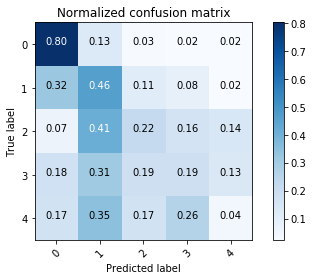

In [325]:
mlp_og = MLPClassifier(max_iter=1000)
mlp_og = prepare_and_execute_train_data(mlp_og, train_x_original, train_y_original, 5)

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=2000,
                    hidden_layer_sizes=(200, 80))
mlp = prepare_and_execute_train_data(mlp, train_x, train_y, 5)

## Model Finalization and Export
---
The model with the best prediction performance is chosen and exported as a Sklearn model for use in predicting (classifying) test data.

In [326]:
from sklearn.externals import joblib

##### Choose the best-scored model
The model with the best prediction performance is finalized and ready to be exported here.

In [327]:
chosen_model = mlp
chosen_model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 80), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Export model to external file
Here the finalized model is dumped into an external file using sklearn's joblib method. The exported model will be saved and can be used to predict the test data.

In [328]:
joblib.dump(chosen_model, '../models/heart_disease.joblib', compress=1)

['../models/heart_disease.joblib']

##### End of Section

# Model Import and Prediction
---
13516013 - Azka Nabilah Mumtaz <br>
13516062 - Yusuf Rahmat Pratama<br>
13516095 - Faza Fahleraz<br>
13516101 - Kelvin Kristian<br>
13516102 - Steven Sukma Limanus

In this section, the exported model will be imported and used to predict test data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

## Model Import & Data Preparation
---
##### Model Import
Here the external file which holds the exported model from the training section is imported and assigned to a variable

In [53]:
imported_model = joblib.load('../models/heart_disease.joblib')
imported_model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 80), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Load Test Data
Test data are loaded here

In [46]:
test = pd.read_csv('../data/tubes2_HeartDisease_test.csv')
test.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'serum_cholestrol', 
                 'high_fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                 'st_depression', 'peak_exercise_st', 'major_vessels_num', 'thal']

test.head()

age  sex  chest_pain_type rest_blood_pressure serum_cholestrol  \
0   60    1                2                 160              267   
1   61    1                4                 148              203   
2   54    1                4                 130              242   
3   48    1                4                 120              260   
4   57    0                1                 130              308   

  high_fasting_blood_sugar  resting_ecg max_heart_rate  \
0                        1            1            157   
1                        0            0            161   
2                        0            0             91   
3                        0            0            115   
4                        0            0             98   

  exercise_induced_angina st_depression peak_exercise_st major_vessels_num  \
0                       0           0.5                2                 ?   
1                       0             0                1                 1   
2                       1             1                2                 ?   
3                       0             2                2                 ?   
4                       0             1                2                 ?   

  thal  
0    ?  
1    7  
2    ?  
3    ?  
4    ?

### Preprocessing

#### Handle missing values
Some data contain unknown value in some of their attributes, therefore needed to be processed. 

The string '?' that represents the unknown value is replaced with NaN to make data uniformly numeric, and all data are cast into float to process NaN as well (NaN is represented as float in Numpy). 

In [47]:
test = test.replace('?', np.nan).astype(float)

For now, mean of each attributes is used to input value to the unknown-valued data for the free-discrete attributes, and mode of each attributes is used for the ranged discrete attributes.

In [48]:
categorical_attributes = ["sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", "exercise_induced_angina", "peak_exercise_st", "major_vessels_num", "thal"]
series_attributes = ["age", "rest_blood_pressure", "serum_cholestrol", "max_heart_rate", "st_depression"]

test[categorical_attributes] = test[categorical_attributes].fillna(test.mode().iloc[0])
test[series_attributes] = test[series_attributes].fillna(test.mean())
test[categorical_attributes] = test[categorical_attributes].astype('category')

test.head()

age  sex chest_pain_type  rest_blood_pressure  serum_cholestrol  \
0  60.0  1.0             2.0                160.0             267.0   
1  61.0  1.0             4.0                148.0             203.0   
2  54.0  1.0             4.0                130.0             242.0   
3  48.0  1.0             4.0                120.0             260.0   
4  57.0  0.0             1.0                130.0             308.0   

  high_fasting_blood_sugar resting_ecg  max_heart_rate  \
0                      1.0         1.0           157.0   
1                      0.0         0.0           161.0   
2                      0.0         0.0            91.0   
3                      0.0         0.0           115.0   
4                      0.0         0.0            98.0   

  exercise_induced_angina  st_depression peak_exercise_st major_vessels_num  \
0                     0.0            0.5              2.0               0.0   
1                     0.0            0.0              1.0               1.0   
2                     1.0            1.0              2.0               0.0   
3                     0.0            2.0              2.0               0.0   
4                     0.0            1.0              2.0               0.0   

  thal  
0  7.0  
1  7.0  
2  7.0  
3  7.0  
4  7.0

##### Rearrange Columns
Columns are rearranged with one-hot encoding to make it equivalent with the preprocessed train data

In [49]:
test = test.drop('thal', 1)
test = test.drop('major_vessels_num', 1)

test = pd.get_dummies(test, prefix=[
    "sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", 
    "exercise_induced_angina", "peak_exercise_st"])


test.head()

age  rest_blood_pressure  serum_cholestrol  max_heart_rate  st_depression  \
0  60.0                160.0             267.0           157.0            0.5   
1  61.0                148.0             203.0           161.0            0.0   
2  54.0                130.0             242.0            91.0            1.0   
3  48.0                120.0             260.0           115.0            2.0   
4  57.0                130.0             308.0            98.0            1.0   

   sex_0.0  sex_1.0  chest_pain_type_1.0  chest_pain_type_2.0  \
0        0        1                    0                    1   
1        0        1                    0                    0   
2        0        1                    0                    0   
3        0        1                    0                    0   
4        1        0                    1                    0   

   chest_pain_type_3.0          ...           high_fasting_blood_sugar_0.0  \
0                    0          ...                                      0   
1                    0          ...                                      1   
2                    0          ...                                      1   
3                    0          ...                                      1   
4                    0          ...                                      1   

   high_fasting_blood_sugar_1.0  resting_ecg_0.0  resting_ecg_1.0  \
0                             1                0                1   
1                             0                1                0   
2                             0                1                0   
3                             0                1                0   
4                             0                1                0   

   resting_ecg_2.0  exercise_induced_angina_0.0  exercise_induced_angina_1.0  \
0                0                            1                            0   
1                0                            1                            0   
2                0                            0                            1   
3                0                            1                            0   
4                0                            1                            0   

   peak_exercise_st_1.0  peak_exercise_st_2.0  peak_exercise_st_3.0  
0                     0                     1                     0  
1                     1                     0                     0  
2                     0                     1                     0  
3                     0                     1                     0  
4                     0                     1                     0  

[5 rows x 21 columns]

## Test Data Prediction
---
Here the test data will be labeled using model prediction fitted from the training data

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

##### Predicting Test Data

In [54]:
test = np.array(test)
predicted_test = imported_model.predict(test)
predicted_test

array([0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 4, 3, 0, 0, 1, 0, 2,
       0, 1, 3, 0, 1, 3, 4, 1, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 4, 2, 0, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 3, 0, 3, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 4,
       1, 3, 0, 0, 0, 2, 0, 3, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3, 3, 1, 0, 1,
       3, 2, 3, 3, 0, 0, 0, 0, 0])

##### Visualizing Predicted Data


<Container object of 5 artists>

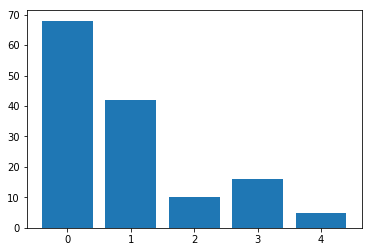

In [64]:
x, y = np.unique(predicted_test, return_counts=True)
plt.bar(x, y)